After installing **kima**, we'll go through one of the examples
to start playing with the package. Let's find 51 Peg *b*!  

51 Peg *b* was the first exoplanet discovered around a solar-type star. The
original paper, by [Mayor & Queloz
(1995)](https://www.nature.com/articles/Art1), used data from the ELODIE
spectrograph. Here we will use another dataset, obtained with the Hamilton
echelle spectrograph, situated in the Lick Observatory, in California (see
[Butler et al. 2006](https://ui.adsabs.harvard.edu/?#abs/2006ApJ...646..505B)).

Let's import the package and the example

In [1]:
import kima
from kima.examples import _51Peg

<div class="admonition note">
    <div class="admonition-title">Note</div>
    <p style="margin-top: 1em">
        The name <code>_51Peg</code> is a bit weird simply because Python variable names cannot start with a number. 🤷
    </p>
</div>

To take a quick look at the RV data, let's call the `_51Peg` function to just
build the model, without running it:

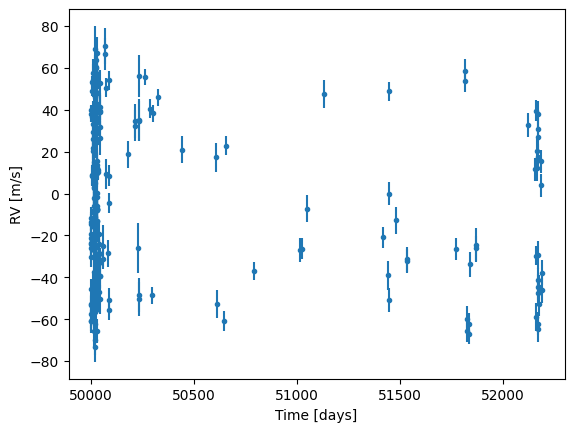

In [3]:
model = _51Peg()

model.data.plot();

The data consist of 256 observations over almost 6 years, from October 1995 to
October 2001. Our goal is to fit a Keplerian model to these radial-velocity
observations. We will assumme the number of Keplerians to be free, with a
uniform prior between 0 and 1, while all other priors take default values.

We could run this model using the `kima.run()` function, but let's use the
example directly (which runs 5000 steps by default):

In [14]:
model, res = _51Peg(run=True, load=True)

log(Z) = -907.1448171972309
Information = 33.55284794677641 nats.
Effective sample size = 534.6495957420269


100%|██████████| 534/534 [00:00<00:00, 9019.79it/s]


We also loaded the results into the `res` variable, which we can use to look at
some posterior distributions.

For example, the posterior for the number of planet is quite clear, showing the
significant detection of the planet:

Np probability ratios:  []


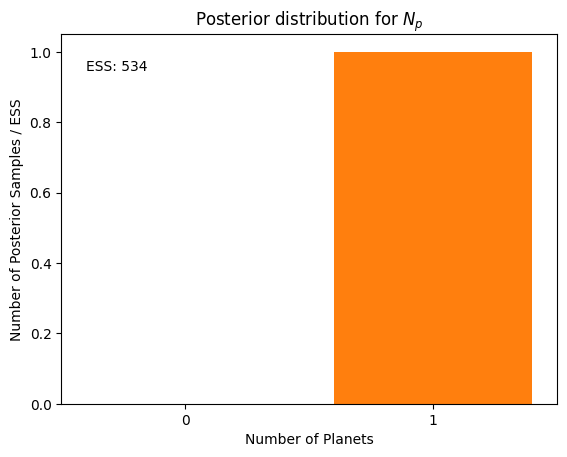

In [15]:
res.plot_posterior_np();

The orbital period is also very well constrained:

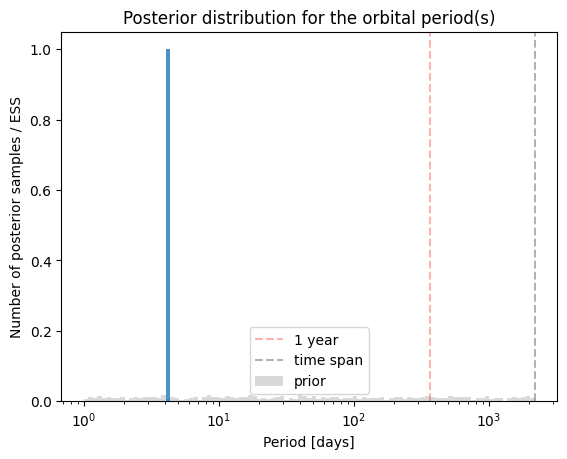

In [16]:
res.plot_posterior_periods(show_prior=True);

<div class="admonition note">
    <div class="admonition-title">Note</div>
    <p style="margin-top: 1em">
        The plot above also shows samples from the prior distribution,
        which is log-uniform extending from 1 day to the timespan of the data.
    </p>
</div>

We can also plot the histograms of the posteriors for the systemic velocity and
for the instrumental jitter

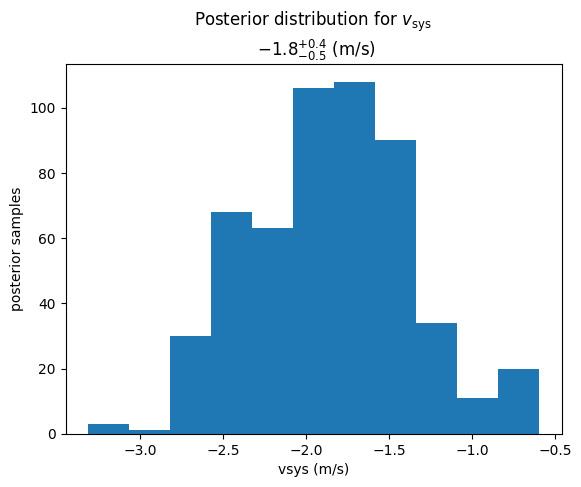

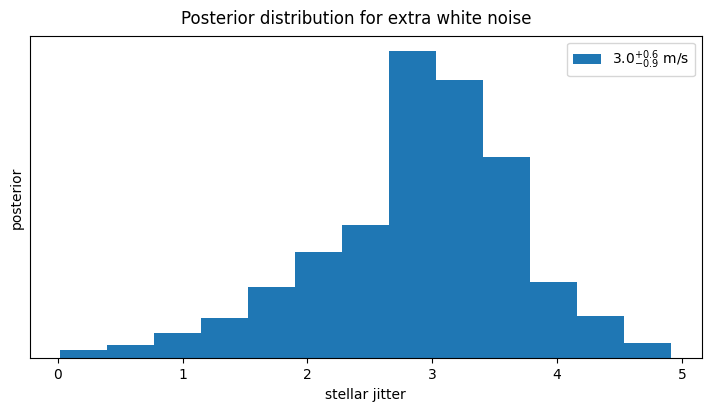

In [22]:
res.hist_vsys();
res.hist_jitter();

and the (more interesting) phase plot using the maximum likelihood solution

In [19]:
p = res.maximum_likelihood_sample()

Sample with the highest likelihood value (logL = -869.59)
-> might not be representative of the full posterior distribution

jitter:
  [2.8930339]
number of planets:  1
orbital parameters:           P           K          M0           e           w 
                        4.23073    55.93763     5.07937     0.01090     0.61465
vsys:  -1.78331207


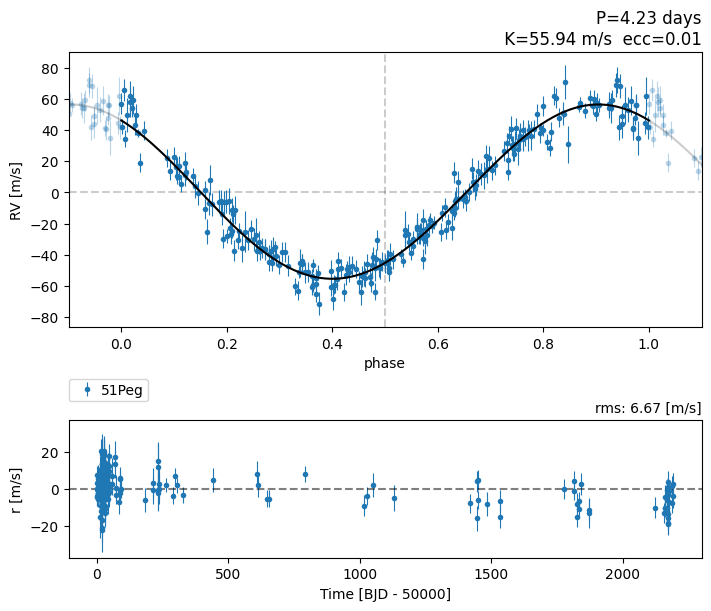

In [20]:
res.phase_plot(p);

So, **kima** tells us that a planet at a period of 4.23 days and an amplitude of
~56 m/s is the best model given the RV data. If it was 1995, we'd be going about
changing the history of astronomy!
